In [33]:
from fastai.vision.all import *
import seaborn as sns


sns.set()


In [34]:
path = untar_data(URLs.PETS)


In [35]:
path.ls()


(#2) [Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/annotations'),Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images')]

In [36]:
(path/"images").ls()[:4]


(#4) [Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.mat')]

In [37]:
(path.ls())


(#2) [Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/annotations'),Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images')]

In [38]:
(path/"images").ls()[:4]


(#4) [Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.mat')]

### Parse breeds names

In [39]:
fname = (path/"images").ls()[0]
fname


Path('C:/Users/Vadim/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg')

In [40]:
re.findall(r'(.+)_\d+.jpg$', fname.name)


['Abyssinian']

In [41]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


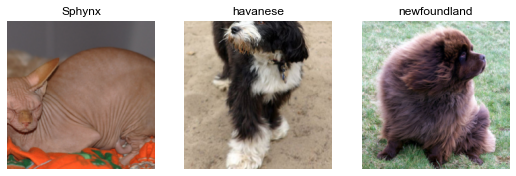

In [42]:
dls.show_batch(nrows=1, ncols=3)